## Northwind Traders

<h3> Recommended Analysis <h3>

1.Are there any noticable sales trends over time?

2.Which are the best and worst selling products?

3.Can you identify any key customers?

4.Are shipping costs consistent across providers?

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import datetime
import warnings 
warnings.filterwarnings("ignore")

#### File Path

In [105]:
categories_path = r'C:\Users\Admin\My Project\Northwind\Dataset\categories.csv'
customers_path = r'C:\Users\Admin\My Project\Northwind\Dataset\customers.csv'
employees_path = r'C:\Users\Admin\My Project\Northwind\Dataset\employees.csv'
order_details_path = r'C:\Users\Admin\My Project\Northwind\Dataset\order_details.csv'
orders_path = r'C:\Users\Admin\My Project\Northwind\Dataset\orders.csv'
products_path = r'C:\Users\Admin\My Project\Northwind\Dataset\products.csv'
shippers_path = r'C:\Users\Admin\My Project\Northwind\Dataset\shippers.csv'

#### Load Data

In [106]:
categories = pd.read_csv(categories_path)
customers = pd.read_csv(customers_path, encoding='ANSI')
employees = pd.read_csv(employees_path)
order_details = pd.read_csv(order_details_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path, encoding='ANSI')
shippers = pd.read_csv(shippers_path)

In [107]:
print('order_details:- ',order_details.columns)
print("")
print('orders:- ',orders.columns)
print("")
print('categories:- ',categories.columns)
print("")
print('customers:- ',customers.columns)
print("")
print('employees:- ',employees.columns)
print("")
print('products:- ',products.columns)
print("")
print('shippers:- ',shippers.columns)


order_details:-  Index(['orderID', 'productID', 'unitPrice', 'quantity', 'discount'], dtype='object')

orders:-  Index(['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate',
       'shippedDate', 'shipperID', 'freight'],
      dtype='object')

categories:-  Index(['categoryID', 'categoryName', 'description'], dtype='object')

customers:-  Index(['customerID', 'companyName', 'contactName', 'contactTitle', 'city',
       'country'],
      dtype='object')

employees:-  Index(['employeeID', 'employeeName', 'title', 'city', 'country', 'reportsTo'], dtype='object')

products:-  Index(['productID', 'productName', 'quantityPerUnit', 'unitPrice',
       'discontinued', 'categoryID'],
      dtype='object')

shippers:-  Index(['shipperID', 'companyName'], dtype='object')


#### Merge Tables

In [108]:
## merge order_details and orders
orders.duplicated(subset='orderID').sum()
chunk_1 = pd.merge(order_details, orders, how='left',on='orderID')

## Merge chunk_1 and products
chunk_2 = pd.merge(chunk_1, products, how='left', on='productID')

## merge chunk_2 and categories
chunk_3 = pd.merge(chunk_2, categories, how='left', on='categoryID')

## merge chunk_3 and customers
chunk_4 = pd.merge(chunk_3, customers, how='left',on='customerID')

## merge chunk_4 and employees
chunk_5 = pd.merge(chunk_4, employees, how='left', on='employeeID')

## merge chunk_5 and shippers
chunk_6 = pd.merge(chunk_5, shippers, how='left', on='shipperID')

#### Data Cleaning

In [109]:
chunk_5.head(5)

,orderID,productID,unitPrice_x,quantity,discount,customerID,employeeID,orderDate,requiredDate,shippedDate,...,companyName,contactName,contactTitle,city_x,country_x,employeeName,title,city_y,country_y,reportsTo
0,10248,11,14.0,12,0.0,VINET,5,2013-07-04,2013-08-01,2013-07-16,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,Steven Buchanan,Sales Manager,London,UK,2.0
1,10248,42,9.8,10,0.0,VINET,5,2013-07-04,2013-08-01,2013-07-16,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,Steven Buchanan,Sales Manager,London,UK,2.0
2,10248,72,34.8,5,0.0,VINET,5,2013-07-04,2013-08-01,2013-07-16,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,Steven Buchanan,Sales Manager,London,UK,2.0
3,10249,14,18.6,9,0.0,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,Michael Suyama,Sales Representative,London,UK,5.0
4,10249,51,42.4,40,0.0,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,Michael Suyama,Sales Representative,London,UK,5.0


In [110]:
chunk_5.columns

Index(['orderID', 'productID', 'unitPrice_x', 'quantity', 'discount',
       'customerID', 'employeeID', 'orderDate', 'requiredDate', 'shippedDate',
       'shipperID', 'freight', 'productName', 'quantityPerUnit', 'unitPrice_y',
       'discontinued', 'categoryID', 'categoryName', 'description',
       'companyName', 'contactName', 'contactTitle', 'city_x', 'country_x',
       'employeeName', 'title', 'city_y', 'country_y', 'reportsTo'],
      dtype='object')

In [111]:
final_chunk = chunk_5[['orderDate', 'requiredDate', 'shippedDate', 'productName', 'discontinued','categoryName', 'description',
       'companyName','orderID', 'contactName', 'contactTitle', 'city_x', 'country_x', 'employeeName', 'title', 'city_y', 
       'country_y', 'reportsTo','quantityPerUnit', 'quantity', 'discount', 'freight', 'unitPrice_y']]

In [112]:
final_chunk.rename(columns={'city_x':'cus_city', 'country_x':'cus_country','city_y':'emp_city',
                             'country_y':'emp_country', 'unitPrice_y':'unitPrice' },inplace=True)

In [113]:
final_chunk.columns

Index(['orderDate', 'requiredDate', 'shippedDate', 'productName',
       'discontinued', 'categoryName', 'description', 'companyName', 'orderID',
       'contactName', 'contactTitle', 'cus_city', 'cus_country',
       'employeeName', 'title', 'emp_city', 'emp_country', 'reportsTo',
       'quantityPerUnit', 'quantity', 'discount', 'freight', 'unitPrice'],
      dtype='object')

In [114]:

final_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderDate        2155 non-null   object 
 1   requiredDate     2155 non-null   object 
 2   shippedDate      2082 non-null   object 
 3   productName      2155 non-null   object 
 4   discontinued     2155 non-null   int64  
 5   categoryName     2155 non-null   object 
 6   description      2155 non-null   object 
 7   companyName      2155 non-null   object 
 8   orderID          2155 non-null   int64  
 9   contactName      2155 non-null   object 
 10  contactTitle     2155 non-null   object 
 11  cus_city         2155 non-null   object 
 12  cus_country      2155 non-null   object 
 13  employeeName     2155 non-null   object 
 14  title            2155 non-null   object 
 15  emp_city         2155 non-null   object 
 16  emp_country      2155 non-null   object 
 17  reportsTo     

In [115]:
final_chunk['orderDate'] = pd.to_datetime(final_chunk['orderDate'], format='%Y-%m-%d')
final_chunk['requiredDate'] = pd.to_datetime(final_chunk['requiredDate'], format='%Y-%m-%d')
final_chunk['shippedDate'] = pd.to_datetime(final_chunk['shippedDate'], format='%Y-%m-%d')

#### Now Perform Analysis

🔹 EDA

1. Aggregations & Sales Analysis  
-----------------------------------------------------  
- How do you calculate the total revenue generated from all orders, considering discounts?  
- Find the top 3 most frequently purchased products based on order quantity.  
- Write a query to find the highest revenue-generating product category.  
- How would you calculate the average order value per customer?  
- Retrieve the top 5 customers who have spent the most money, along with their total spending.  

2. Customer & Employee Insights  
-----------------------------------------------------  
- Identify customers who have not placed an order in the last 6 months.  
- Find employees who have handled more than 100 orders.  
- Retrieve the total sales made by each employee along with their name.  
- How would you find the customer with the highest single order value?  
- Find the most common customer location (city and country) where orders are placed.  

3. Product & Inventory Analysis  
-----------------------------------------------------  
- Identify products that were ordered but are now discontinued.  
- How would you calculate the average selling price of each product?  
- Retrieve a list of products that have never been ordered.  
- Find the top 3 slowest-selling products in the last 12 months.  
- Calculate the average number of products per order.  


In [116]:
## How do you calculate the total revenue generated from all orders, considering discounts?

final_chunk['Revenue'] = final_chunk.eval("(unitPrice * quantity * (1-discount/100))")
print("Total Revanue :- ",round(final_chunk['Revenue'].sum()/1e6,2),"M")

Total Revanue :-  1.45 M


Text(0.5, 1.0, 'top 3 most frequently purchased products based on order quantity')

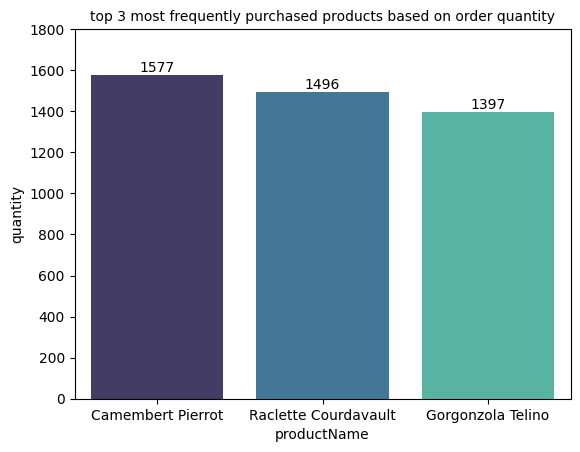

In [117]:
## Find the top 3 most frequently purchased products based on order quantity. 
top_pro  =  final_chunk.groupby('productName')['quantity'].sum().reset_index()
top_3_products = top_pro.sort_values(by='quantity', ascending=False).head(3)

ax = sns.barplot(x='productName', y='quantity', data=top_3_products, palette='mako')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=10)
plt.ylim(0,1800)
plt.title("top 3 most frequently purchased products based on order quantity",fontsize=10)

Text(0.5, 1.0, 'highest revenue-generating product category')

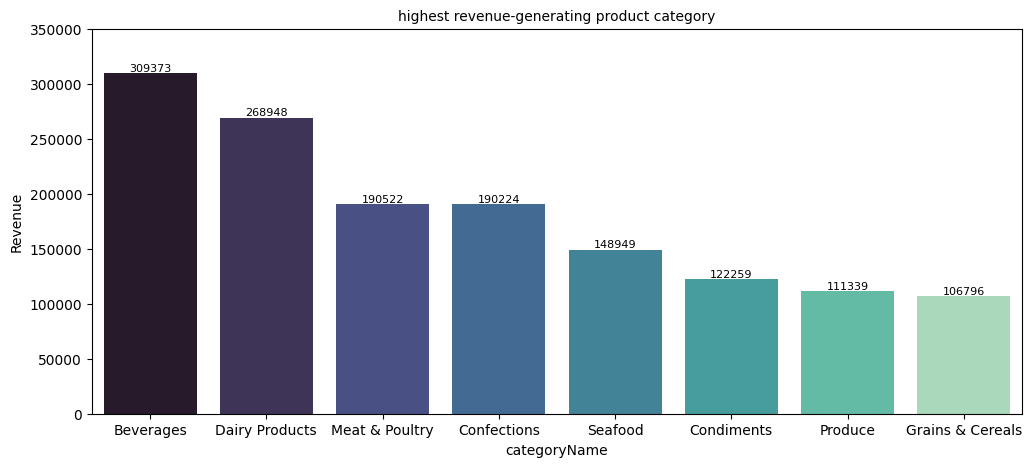

In [118]:
## Write a query to find the highest revenue-generating product category.
plt.figure(figsize=(12,5))
pro_cat_rev = final_chunk.groupby('categoryName')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)
ax = sns.barplot(x='categoryName', y='Revenue', data=pro_cat_rev, palette='mako')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=8)
plt.ylim(0,350000)
plt.title('highest revenue-generating product category', fontsize=10)

In [119]:
final_chunk.columns

Index(['orderDate', 'requiredDate', 'shippedDate', 'productName',
       'discontinued', 'categoryName', 'description', 'companyName', 'orderID',
       'contactName', 'contactTitle', 'cus_city', 'cus_country',
       'employeeName', 'title', 'emp_city', 'emp_country', 'reportsTo',
       'quantityPerUnit', 'quantity', 'discount', 'freight', 'unitPrice',
       'Revenue'],
      dtype='object')

In [120]:
## How would you calculate the average order value per customer
avg_order_cus = final_chunk.groupby('companyName')['Revenue'].mean().reset_index()
total_avg_order = round(avg_order_cus['Revenue'].mean(),2)
print(total_avg_order)

519.92


Text(0.5, 1.0, 'top 5 customers who have spent the most money')

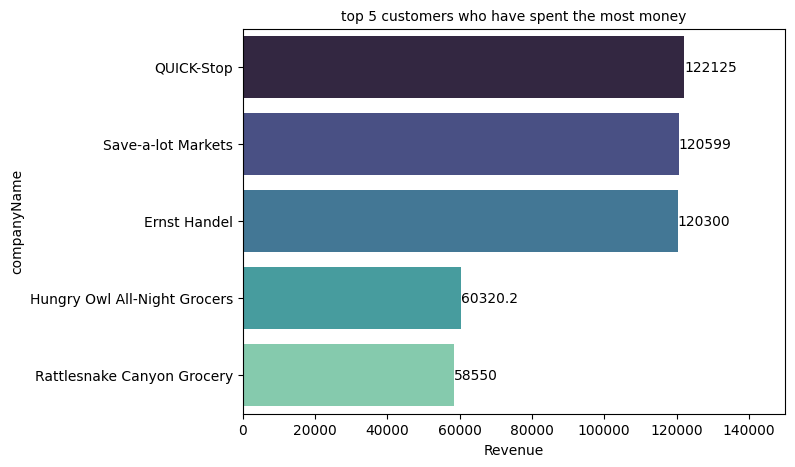

In [121]:
## Retrieve the top 5 customers who have spent the most money, along with their total spending
total_spending = final_chunk.groupby('companyName')['Revenue'].sum().reset_index()
top_5_customer = total_spending.sort_values(by='Revenue', ascending=False).head(5)
top_5_customer['Revenue'] = top_5_customer['Revenue'].round(2)

plt.figure(figsize=(7,5))
ax = sns.barplot(x='Revenue', y='companyName',data=top_5_customer,palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlim(0,150000)
plt.title('top 5 customers who have spent the most money', fontsize=10)

### 2. Customer & Employee Insights  


2. Customer & Employee Insights  
-----------------------------------------------------  
- Identify customers who have not placed an order in the last 6 months.  
- Find employees who have handled more than 100 orders.  
- Retrieve the total sales made by each employee along with their name.  
- How would you find the customer with the highest single order value?  
- Find the most common customer location (city and country) where orders are placed. 

In [125]:
final_chunk.columns


Index(['orderDate', 'requiredDate', 'shippedDate', 'productName',
       'discontinued', 'categoryName', 'description', 'companyName', 'orderID',
       'contactName', 'contactTitle', 'cus_city', 'cus_country',
       'employeeName', 'title', 'emp_city', 'emp_country', 'reportsTo',
       'quantityPerUnit', 'quantity', 'discount', 'freight', 'unitPrice',
       'Revenue'],
      dtype='object')

In [123]:
## Identify customers who have not placed an order in the last 6 months. 
referance_date = final_chunk['orderDate'].max()
cutoff_date = referance_date - pd.DateOffset(months=6)
max_order_date = final_chunk.groupby('companyName')['orderDate'].max().reset_index()
inactive_customers = max_order_date[max_order_date['orderDate']< cutoff_date].sort_values(by='orderDate',ascending=False)
inactive_customers.reset_index(drop=True)

,companyName,orderDate
0,Familia Arquibaldo,2014-10-31
1,Mère Paillarde,2014-10-30
2,Hungry Coyote Import Store,2014-09-08
3,Lazy K Kountry Store,2014-05-22
4,Centro comercial Moctezuma,2013-07-18


Text(0.5, 1.0, 'employees who have handled more than 200 orders')

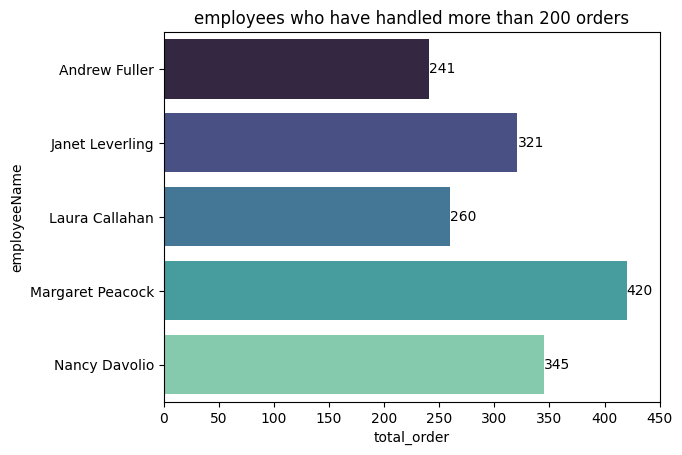

In [143]:
## Find employees who have handled more than 200 orders
emp_total_orders = final_chunk.groupby('employeeName')['orderID'].count().reset_index().rename(columns={'orderID':'total_order'})
emp_200_orders = emp_total_orders[emp_total_orders['total_order']>=200]

ax = sns.barplot(x='total_order', y='employeeName', data=emp_200_orders, palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlim(0,450)
plt.title('employees who have handled more than 200 orders', fontsize=12)



Text(0.5, 1.0, 'total sales made by each employee')

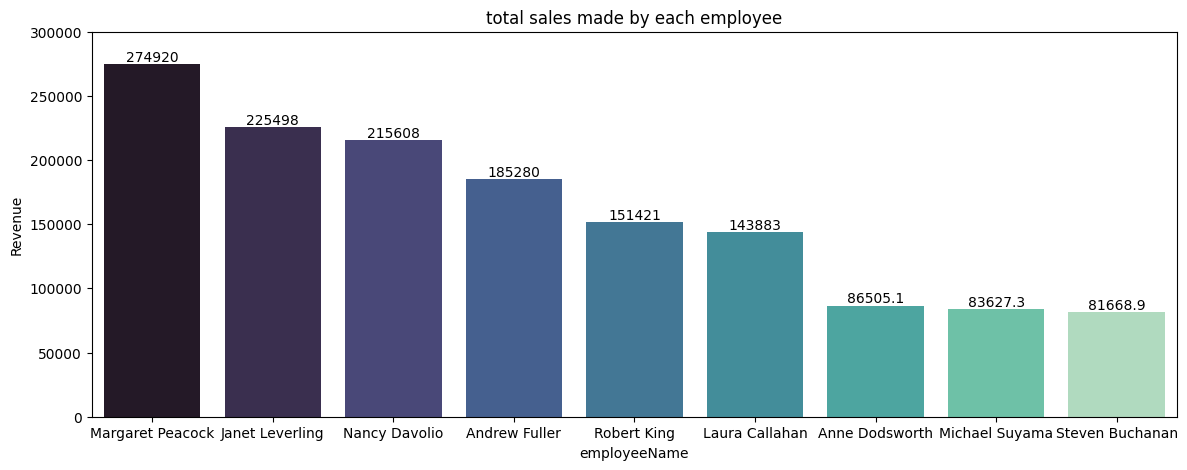

In [155]:
## Retrieve the total sales made by each employee along with their name.
emp_sales = final_chunk.groupby('employeeName')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).round(2)
plt.figure(figsize=(14,5))
ax = sns.barplot(x='employeeName', y='Revenue', data=emp_sales, palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylim(0,300000)
plt.title('total sales made by each employee', fontsize=12)

Text(0.5, 1.0, 'Mothly Total Revanue')

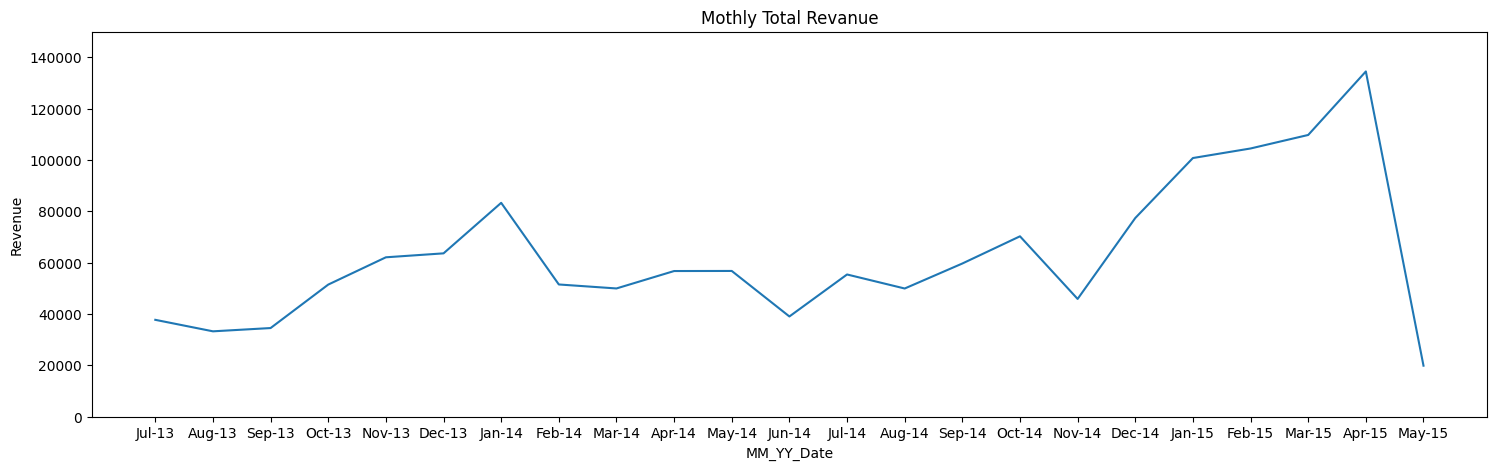

In [204]:
## Mothly Total Revanue
final_chunk['MM_YY_Date'] = final_chunk['orderDate'].dt.to_period('M')
mothly_revanue = final_chunk.groupby('MM_YY_Date')['Revenue'].sum().reset_index().sort_values(by='MM_YY_Date',ascending=True).round(2)
mothly_revanue['MM_YY_Date'] = mothly_revanue['MM_YY_Date'].dt.to_timestamp()
mothly_revanue['MM_YY_Date'] = mothly_revanue['MM_YY_Date'].dt.strftime('%b-%y')

plt.figure(figsize=(18,5))
ax= sns.lineplot(x='MM_YY_Date',y='Revenue',data=mothly_revanue)
plt.ylim(0,150000)
plt.title('Mothly Total Revanue', fontsize=12)